## Skoltech
## Intro to data science, fall 2023
## Assigment 2

### Goals
- Make exploratory data analysis
- Apply feature engineering and feature selection
- Try to solve classification task and use classification performance metrics
- Get the taste of gradient boosting approach

## Each student has personal set of questions

Google sheet with personal questions: https://docs.google.com/spreadsheets/d/1fQukrrzswoaoP633130mDMU0f4sOR4dY8Ai-AssnNDE/edit?usp=sharing

Every column corresponds to a single question, every row to a single student.

A lot of questions do not have individual tasks, so everybody need to complete them (if they are not in the table with individual tasks).

For example, Addisu Zena need to report questions **1.1, 1.2; 2; 3.2, 3.4, 3.5 etc.**

# Submiting the answers

Google form to submit your answers: https://forms.gle/EFhJ9ovtQUVdQRNY6

Use your **skoltech email**. For Name, Surname use **exactly the same spelling** as in canvas system.

---

If your answer is a ``float number``, then it must be provided with **3 decimals after the floating point**, e.g. 1.234

---

If your answer is a ``list of float or integer numbers or str``, then they should be reported in descending (alphabetical) order,  divided by a comma, e.g.:

10.453,9.112,5.001,5.000

---

The last part (Q20) as long as open questions (9, 18.3, 19) do not have corresponding fields in the google form. They are **not optional** and will be graded manually from your .ipynb file.

---

# Grading

For each correct answer from the google form you will get 1 point. The points for Q19 and Q20 are written near the questions.

**Note: the notebook should be linearly executable (restart and run all should work).**

If you have any questions regarding this Home Assignment, ask them in HW2 topic course telegram chat.

#### Import basic libraries

In [1]:
# !pip install ucimlrepo

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set();

from ucimlrepo import fetch_ucirepo 

In [3]:
class DataScience:


    def missing_zero_values_table(self, df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
            columns={0: 'Zero Values', 1: 'Missing Values', 2: '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:, 1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)
        print("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"
                                                                                                       "There are " + str(
            mz_table.shape[0]) +
              " columns that have missing values.")

        return mz_table

    
    def sns_draw(self, data, parametr, bins=30):
        fig = plt.figure(figsize=(15, 6), dpi= 80)
        grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)
        ax_main = fig.add_subplot(grid[:-1, :-1])
        ax_right = fig.add_subplot(grid[:-1, -1])  
        sns.distplot(data[parametr], ax=ax_main)
        sns.boxplot(data[parametr], ax=ax_right)
        ax_right.grid(axis='y')
        ax_main.set(title='График '+parametr)
        ax_main.axvline(np.mean(data[parametr]),color='g', linestyle='--', label='Среднее')
        ax_main.axvline(np.median(data[parametr]),color='g', linestyle='-', label='Медиана')
        ax_main.legend()
        fig.show()
    
    
    def plot_feature_importance(self,importance,names,model_type):

        feature_importance = np.array(importance)
        feature_names = np.array(names)

        #Create a DataFrame using a Dictionary
        data={'feature_names':feature_names,'feature_importance':feature_importance}
        fi_df = pd.DataFrame(data)

        #Sort the DataFrame in order decreasing feature importance
        fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

        #Define size of bar plot
        plt.figure(figsize=(10,8))
        #Plot Searborn bar chart
        sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
        #Add chart labels
        plt.title(model_type + 'FEATURE IMPORTANCE')
        plt.xlabel('FEATURE IMPORTANCE')
        plt.ylabel('FEATURE NAMES')
        
    def fit(self,train_features, train_actuals):
        for name in models.keys():
            est = models[name]
            est_params = params[name]
            gscv = GridSearchCV(estimator=est, param_grid=est_params, cv=5)
            gscv.fit(train_features, train_actuals)
            train_predictions = gscv.predict(features_train)
            predictions = gscv.predict(features_test)
            result_list.append({
            'model': name,
            'train_mae_score': mean_absolute_error(target_train, train_predictions),
            'test_mae_score': mean_absolute_error(target_test, predictions),
            'best_params': gscv.best_params_
            })
            
    
    def dataset_info(self,data):
        data.info()
        display(data.head(10))
        display(data.describe())
        print('Количество дубликатов:', data.duplicated().sum())
    

            
ds = DataScience()

In [4]:
def checktype(obj):
        return bool(obj) and all(isinstance(elem, str) for elem in obj)
    
def list_answer(answers):
    '''
    answers -- list with any format
    
    print answers in HW1 format
    '''
    if checktype(answers):
        answers.sort()
    else:
        answers.sort(reverse=True)
    for i in answers:
        if i != answers[-1]:
            print(i, end=',')
        else:
            print(i)

### Dataset
For the task we'll use Bank Marketing dataset. It contains marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y). A detailed description is available here: https://archive.ics.uci.edu/dataset/222/bank+marketing. 
Let's take a brief look to the dataset.

In [5]:
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
df = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# metadata 
print(bank_marketing.metadata) 
  
# variable information 
print(bank_marketing.variables) 


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

In [6]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
33426,31,management,single,tertiary,no,587,yes,no,cellular,20,apr,16,4,-1,0,NaN
24656,48,admin.,married,secondary,no,2707,no,no,cellular,17,nov,212,2,-1,0,NaN
9598,36,self-employed,married,tertiary,no,16430,yes,no,NaN,6,jun,197,3,-1,0,NaN
19014,59,retired,married,secondary,no,12438,no,no,cellular,5,aug,91,1,-1,0,NaN
3906,36,management,single,tertiary,no,146,yes,no,NaN,16,may,1161,3,-1,0,NaN


In [7]:
df.shape

(45211, 16)

# Section 1. Dataset acquaintance

-----
## Q1
#### 1.1 How many NaN values are there in the dataset?
#### 1.2 What is the highest number of NaN values in a single column?
#### 1.3 What is the name of the column with the smallest number (>0) of NaN values?

In [8]:
ds.dataset_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN
5,35,management,married,tertiary,no,231,yes,no,NaN,5,may,139,1,-1,0,NaN
6,28,management,single,tertiary,no,447,yes,yes,NaN,5,may,217,1,-1,0,NaN
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,NaN,5,may,380,1,-1,0,NaN
8,58,retired,married,primary,no,121,yes,no,NaN,5,may,50,1,-1,0,NaN
9,43,technician,single,secondary,no,593,yes,no,NaN,5,may,55,1,-1,0,NaN


,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Количество дубликатов: 0


In [9]:
ds.missing_zero_values_table(df)

Your selected dataframe has 16 columns and 45211 Rows.
There are 4 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
poutcome,0,36959,81.7,36959,81.7,object
contact,0,13020,28.8,13020,28.8,object
education,0,1857,4.1,1857,4.1,object
job,0,288,0.6,288,0.6,object


Total missing values

In [10]:
df.isnull().sum().sum()

52124

 the highest number of NaN values in a single column

In [11]:
df.isnull().sum()[df.isnull().sum()>0].sort_values().index[0]

'job'

In [12]:
# TODO fill nans
# for categorical columns (if any) fill with 'unknown' value
# for numerical columns (if any) fill with column mean value


In [13]:
df = df.fillna('unknown')

-----
## Q2 
#### What is the fraction of '1' values in the dataset (fraction of accepted deposits, variable y)?

In [14]:
round(float((y.value_counts()[1]/y.count())), 3)

0.117

-----
## Q3 
For convenience, you can add target variale to the DataFrame (but do not forget to remove it from the dataframe after the data exploration).
#### In this question the most / least successful categories are measured in terms of average deposit acceptance rate.
#### 3.1 What is the most successful `poutcome` category?
#### 3.2 What is the most successful `contact` category?
#### 3.3 What is the least successful `marital` category?
#### 3.4 List top 3 most successful `job` categories in alphabetical order
#### 3.5 What is the most successful user profile (combination of marital status and job) - the answer should be in the form `marital,job` (eg. married,entrepreneur)
#### 3.6 Find the job with the smallest median balance. The answer is this job's median balance.

In [15]:
data = df.copy()
data['depo'] = y


In [16]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,depo
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [17]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown


3.1

In [18]:
(data.groupby('poutcome')['depo'].count().sort_values(ascending = False).index[0])

'unknown'

3.2

In [19]:
data.groupby('contact')['depo'].count().sort_values(ascending = False).index[0]

'cellular'

3.3

In [20]:
data.groupby('marital')['depo'].count().sort_values(ascending = False).index[0]

'married'

3.4

In [21]:
q3_4 = list(data.groupby('job')['depo'].count().sort_values(ascending = False).index[0:3])
list_answer(q3_4)

blue-collar,management,technician


3.5

In [22]:
q3_5 = list(data.groupby(['job', 'marital'])['depo'].count().sort_values(ascending = False).index[0])
list_answer(q3_5)

blue-collar,married


3.6

In [23]:
round(data.groupby('job')['balance'].median().sort_values()[0], 3)

339.5

-----
## Q4
Map binary columns to 0 / 1 values (1 corresponds to yes). Do the same for the target variable y.
#### 4.1 Who accepts more deposits (on average): people with housing loans (`housing`) or people with personal loans (`loan`)? The answer is the acceptance rate of the chosen (most successful) category.
#### 4.2 What is the min, max, average and std values of age among people who have housing loans (`housing`)? The answer shold be given in descending order

In [24]:
y

,y
0,no
1,no
2,no
3,no
4,no
...,...
45206,yes
45207,yes
45208,yes
45209,no


In [25]:
# TODO map y (target) values to 0 / 1
y = (y != 'no').astype(int)


In [26]:
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


default, housing, loan 

In [27]:
# TODO map binary columns' values to 0 / 1
bin_columns = ['default', 'housing', 'loan']
for i in bin_columns:
    df[i] = (df[i] != 'no').astype(int)

In [28]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown


In [29]:
print(df.head())

   age           job  marital  education  default  balance  housing  loan  \
0   58    management  married   tertiary        0     2143        1     0   
1   44    technician   single  secondary        0       29        1     0   
2   33  entrepreneur  married  secondary        0        2        1     1   
3   47   blue-collar  married    unknown        0     1506        1     0   
4   33       unknown   single    unknown        0        1        0     0   

   contact  day_of_week month  duration  campaign  pdays  previous poutcome  
0  unknown            5   may       261         1     -1         0  unknown  
1  unknown            5   may       151         1     -1         0  unknown  
2  unknown            5   may        76         1     -1         0  unknown  
3  unknown            5   may        92         1     -1         0  unknown  
4  unknown            5   may       198         1     -1         0  unknown  


In [30]:
df2 = df.copy()
df2['depo'] = y

In [31]:
housing_rate = df2[df2['housing'] == 1]['depo'].mean()
loan_rate = df2[df2['loan'] == 1]['depo'].mean()
if housing_rate > loan_rate:
    print("housing")
else:
    print("loans")

housing


In [32]:
housing_age_stats = df2[df2['housing'] == 1]['age'].describe()[['min', 'max', 'mean', 'std']]
q_4 =[]
for i in housing_age_stats.round(3):
    q_4.append(i)
list_answer(q_4)

78.0,39.175,20.0,8.927


-----

## Q5
### Visualize the feature `age` for success and fail cases. What can you say about received distributions? (use bins=10 or 20). Type letter as your answer
- A. Distributions intersect significantly, hard to say for sure that the age matters.
- B. Distributions intersect significantly, the bigger the age, the bigger the success.
- C. Distributions intersect significantly, the less the age, the bigger the success.
- D. Distributions have almost no intersection, the less the age, the bigger the success.

Correct answer is A

<Axes: xlabel='age', ylabel='Probability'>

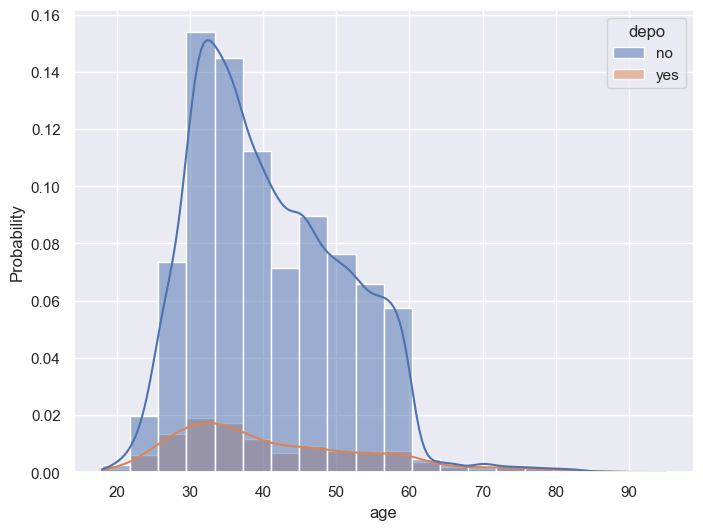

In [33]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='age', hue='depo', stat="probability", kde=True, bins=20)

In [34]:
print('A')

A


## Q6
### Visualize the feature `duration` for success and fail cases. What can you say about received distributions? (use bins=10 or 20). Type letter as your answer
- A. Distributions intersect significantly, hard to say for sure that the duration matters.
- B. Distributions intersect significantly, the bigger the duration, the bigger the success.
- C. Distributions intersect significantly, the less the duration, the bigger the success.
- D. Distributions have almost no intersection, the bigger the duration, the bigger the success.

<Axes: xlabel='duration', ylabel='Probability'>

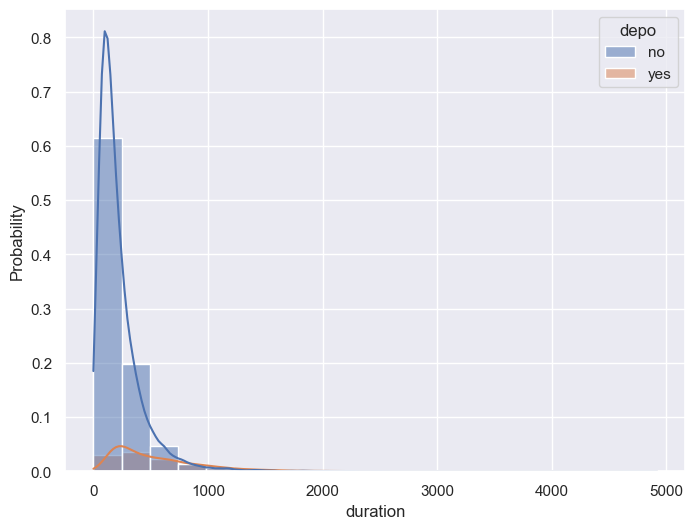

In [35]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='duration', hue='depo', stat="probability", kde=True, bins=20)

In [36]:
print('A')

A


-----

## Q7
#### We need to define a list of numerical columns (not binary). How many numerical columns are there?

In [37]:
# TODO define numerical columns
df.keys()

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [38]:
df.dtypes

age             int64
job            object
marital        object
education      object
default         int32
balance         int64
housing         int32
loan            int32
contact        object
day_of_week     int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
dtype: object

As we see - all binary columns have 'int32' type, and numerical ones - 'int64'

In [39]:
q7 = list(df.dtypes[df.dtypes == 'int64'].index)
list_answer(q7)

age,balance,campaign,day_of_week,duration,pdays,previous


In [40]:
len(q7)

7

-----
## Q8

#### Compute Pearson correlation coefficient between the target variable and:
#### 8.1 `balance`
#### 8.2 `age`
#### 8.3 `duration`
#### 8.4 `pdays`
#### 8.5 What numerical feature has the highest Pearson correlation with the target variable?

#### 8.1 `balance`

In [41]:
p_cor = round(np.corrcoef(np.array(df['balance']), np.array(y.transpose()))[0, 1], 3)

print(p_cor)

0.053


#### 8.2 `age`

In [42]:
p_cor = round(np.corrcoef(np.array(df['age']), np.array(y.transpose()))[0, 1], 3)

print(p_cor)

0.025


#### 8.3 `duration`

In [43]:
p_cor = round(np.corrcoef(np.array(df['duration']), np.array(y.transpose()))[0, 1], 3)

print(p_cor)

0.395


#### 8.4 `pdays`

In [44]:
p_cor = round(np.corrcoef(np.array(df['pdays']), np.array(y.transpose()))[0, 1], 3)

print(p_cor)

0.104


#### 8.5 What numerical feature has the highest Pearson correlation with the target variable?

In [45]:
print('duration')

duration


-----
## Q9
#### Visualize dependency of numerical data with success (target variable). Hint: look at seaborn `pairplot`. What do you think about it? Write your answer in the markdown cell in this notebook

In [46]:
data['depo'] = (data['depo'] != 'no').astype(int)

In [47]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,depo
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


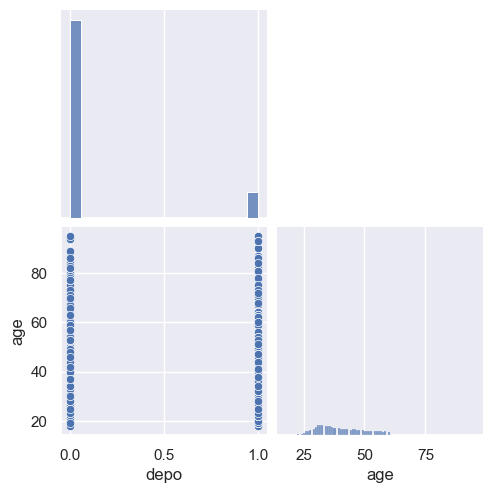

In [48]:
sns.pairplot(data, vars=["depo", "age"], corner=True)

As we see, there is no visible difference between 0 and 1 from age on pairplot.

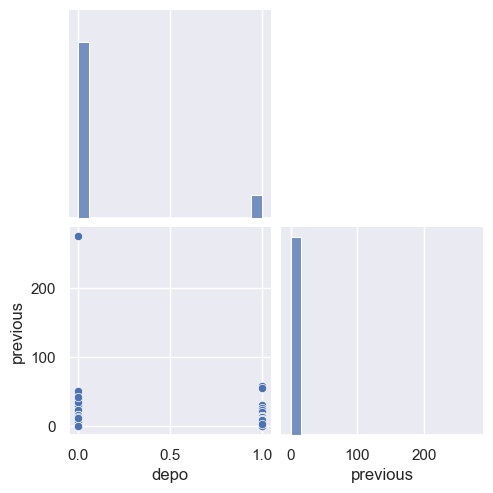

In [49]:
sns.pairplot(data, vars=["depo", "previous"], corner=True)

Looks, like client with most previous has 0 in depo, but clients between 50 and approximately 70 have only 1.

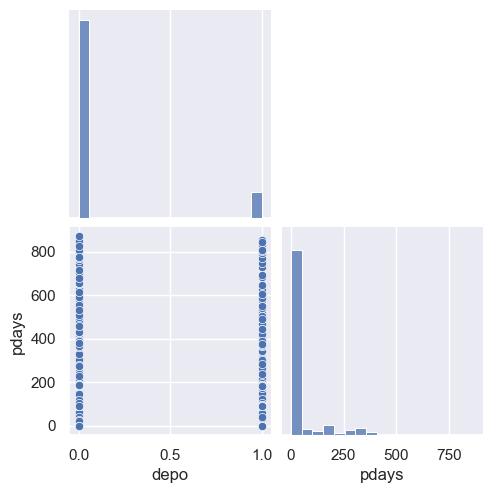

In [50]:
sns.pairplot(data, vars=["depo", "pdays"], corner=True)

There is no significant difference from pdays.

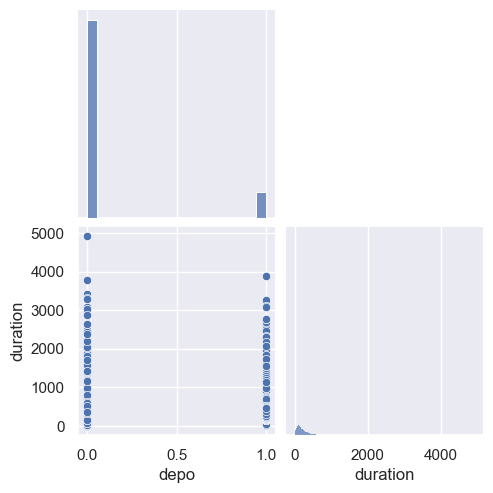

In [51]:
sns.pairplot(data, vars=["depo", "duration"], corner=True)

there are some durations that have only 0 - for example ~5000 and some only with 1 ~4000

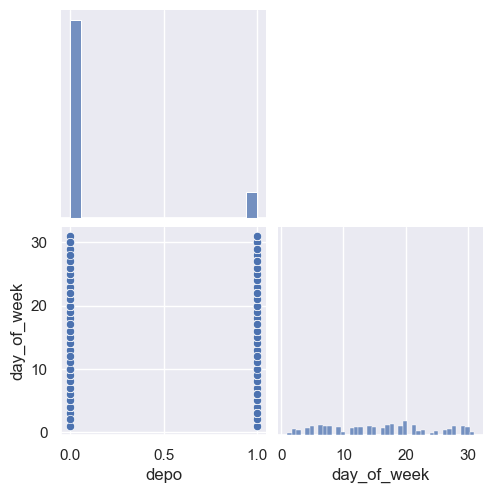

In [52]:
sns.pairplot(data, vars=["depo", "day_of_week"], corner=True)

There is no significant difference from the day of week.

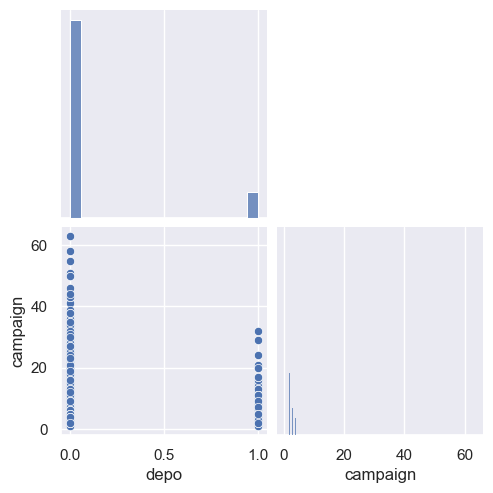

In [53]:
sns.pairplot(data, vars=["depo", "campaign"], corner=True)

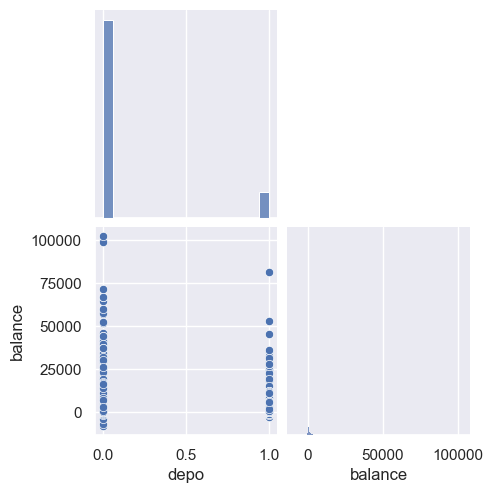

In [54]:
sns.pairplot(data, vars=["depo", "balance"], corner=True)

I don't like such plot - we can't say something here. Pair correlation plot will be better for me.

C:\Users\peter\AppData\Local\Temp\ipykernel_10052\689274541.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),fmt = '.3g',square=True, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')


<Axes: >

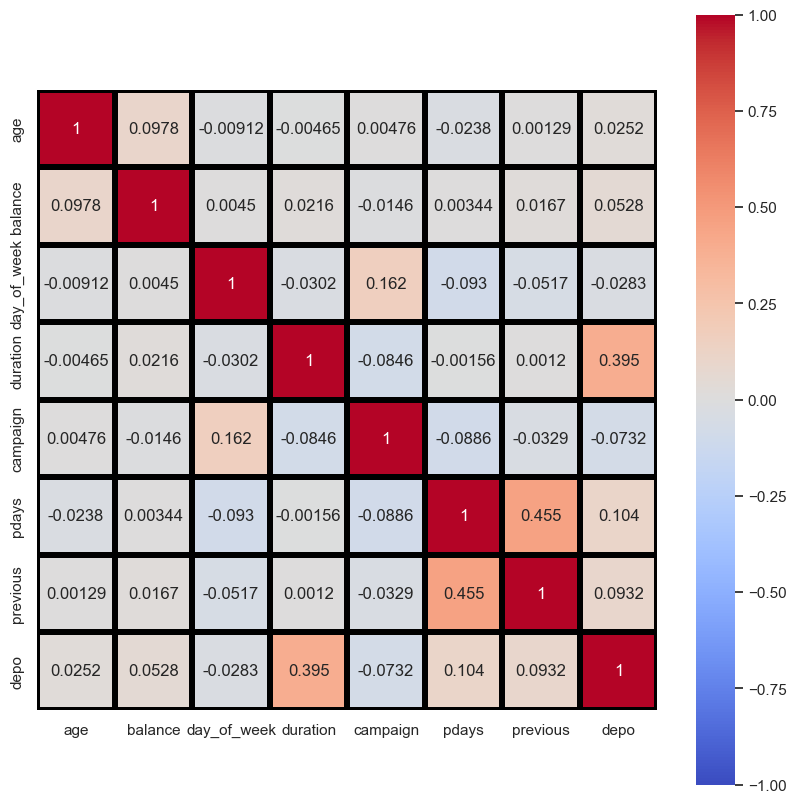

In [55]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(),fmt = '.3g',square=True, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')

## Q10 Feature generation
Lets' generate some more features that could be useful.

#### Create a binary column that would hold the info if the person was contacted before (use column `pdays`). How many people were not contacted earlier?

In [56]:
df['contacted'] = (df['pdays'] != -1).astype(int)

In [57]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,contacted
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,0
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,0
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [58]:
df[(df["contacted"]==0)].shape[0]

36954

------
-----
# Preprocessing

## Q11
Drop the leaking column with target variable from your dataframe (if you have added it earlier).

#### How many columns do you have now?

In [59]:
len(df.keys())

17

-----
## Q12
Add one-hot labels for categorical columns. For a column with $k$ categories you should keep $k - 1$ one-hot columns.

Drop the initial categorical columns from the DataFrame. 

#### How many resulting columns in a DataFrame do you have after this operation?

In [60]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,contacted
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
5,35,management,married,tertiary,0,231,1,0,unknown,5,may,139,1,-1,0,unknown,0
6,28,management,single,tertiary,0,447,1,1,unknown,5,may,217,1,-1,0,unknown,0
7,42,entrepreneur,divorced,tertiary,1,2,1,0,unknown,5,may,380,1,-1,0,unknown,0
8,58,retired,married,primary,0,121,1,0,unknown,5,may,50,1,-1,0,unknown,0
9,43,technician,single,secondary,0,593,1,0,unknown,5,may,55,1,-1,0,unknown,0


In [61]:
df = pd.get_dummies(df, drop_first=True)

In [62]:
df.head()

,age,default,balance,housing,loan,day_of_week,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [63]:
len(df.keys())

43

## Q13
Split the dataset without stratification and with random state 42 and test size 0.2.
#### How many of successful deposit subsciptions are in train set?

In [64]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [65]:
len(y_train)

36168

How many of successful deposit subsciptions are in train set?

In [66]:
y_train.sum()

y    4198
dtype: int64

It is better to check fraction:

In [67]:
y_train.sum()/len(y_train)

y    0.116069
dtype: float64

For test:

In [68]:
y_test.sum()/len(y_test)

y    0.120646
dtype: float64

difference ~ 1%

## Q14 Feature selection
Scale the numeric columns with standard scaler
#### What is median value in `duration` field after scaling?

In [69]:
scaler = StandardScaler()
features =list(X_train.columns)
X_train[features] = scaler.fit_transform(X_train[list(features)])
X_test[features] = scaler.transform(X_test[list(features)])
X_train.head(10)

,age,default,balance,housing,loan,day_of_week,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
3344,0.006515,-0.138113,-0.169381,0.892343,-0.438594,-0.098218,-0.719756,-0.565886,-0.411364,-0.244772,...,-0.425164,-0.368202,-0.102219,1.516277,-0.310107,-0.129771,-0.113999,-0.207791,-0.186046,0.472806
17965,0.759937,-0.138113,0.017848,0.892343,-0.438594,1.703422,0.047138,-0.245389,-0.411364,-0.244772,...,2.352033,-0.368202,-0.102219,-0.659510,-0.310107,-0.129771,-0.113999,-0.207791,-0.186046,0.472806
18299,0.100693,-0.138113,0.820681,-1.120646,-0.438594,1.823532,-0.493970,0.395606,-0.411364,-0.244772,...,2.352033,-0.368202,-0.102219,-0.659510,-0.310107,-0.129771,-0.113999,-0.207791,-0.186046,0.472806
10221,-0.370196,-0.138113,-0.489588,0.892343,-0.438594,-0.578656,0.459781,2.639088,-0.411364,-0.244772,...,-0.425164,2.715898,-0.102219,-0.659510,-0.310107,-0.129771,-0.113999,-0.207791,-0.186046,0.472806
32192,1.419181,-0.138113,0.706889,-1.120646,-0.438594,-0.098218,0.027674,-0.245389,-0.411364,-0.244772,...,-0.425164,-0.368202,-0.102219,-0.659510,-0.310107,-0.129771,-0.113999,-0.207791,-0.186046,0.472806
23098,-0.181840,-0.138113,0.828951,-1.120646,-0.438594,1.222985,0.000424,2.959585,-0.411364,-0.244772,...,-0.425164,-0.368202,-0.102219,-0.659510,-0.310107,-0.129771,-0.113999,-0.207791,-0.186046,0.472806
6633,-1.029440,-0.138113,-0.169381,0.892343,-0.438594,1.463204,0.015995,1.036601,-0.411364,-0.244772,...,-0.425164,-0.368202,-0.102219,1.516277,-0.310107,-0.129771,-0.113999,-0.207791,-0.186046,0.472806
313,-0.370196,-0.138113,-0.318569,0.892343,2.280013,-1.299312,-0.166969,-0.245389,-0.411364,-0.244772,...,-0.425164,-0.368202,-0.102219,1.516277,-0.310107,-0.129771,-0.113999,-0.207791,-0.186046,0.472806
12525,-1.406151,-0.138113,-0.268619,-1.120646,-0.438594,-1.539531,-0.420005,-0.565886,-0.411364,-0.244772,...,2.352033,-0.368202,-0.102219,-0.659510,-0.310107,-0.129771,-0.113999,-0.207791,-0.186046,0.472806
44313,1.325003,-0.138113,-0.013578,-1.120646,-0.438594,1.463204,0.323531,-0.565886,0.507660,0.598884,...,2.352033,-0.368202,-0.102219,-0.659510,-0.310107,-0.129771,-0.113999,-0.207791,5.375026,-2.115033


In [70]:
print('Median for duration: {}'.format(round(X_train['duration'].median(), 3)))

Median for duration: -0.299


## Q15 Estimate feature importance by Anova
#### What are the three most important features by anova with f classifier?

In [71]:
from sklearn.feature_selection import SelectKBest, f_classif 
bestfeatures = SelectKBest(score_func = f_classif, k = 3)
bestfeatures.fit_transform(X_train,y_train)
mask = bestfeatures.get_support()
features =X_train.columns
q_15 = list(features[mask])
list_answer(q_15)

contacted,duration,poutcome_success


C:\Users\peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


------

## Q16 Logistic regression
Build a model with logistic regression.
Use l2 penalty and search for optimal C in `np.logspace(-2, 4, 7)`, set `max_iter = 400`.

#### Q16.1 What is an optimal C for l2 regularization?
#### Q16.2 What is the accuracy for this params?
#### Q16.3 What is the three most important features by logistic regression estimation?
#### Q16.4 Build roc curve and calculate roc-auc score. What is the roc-auc score?

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_curve, roc_auc_score
parameters = {'C' :np.logspace(-2, 4, 7)}
model = LogisticRegression(penalty='l2', max_iter = 400)
log_reg= GridSearchCV(model, parameters, scoring='r2' ,cv=5, n_jobs = -1, verbose=False)

#fit the grid search
log_reg.fit(X_train, y_train)
print(log_reg.best_estimator_)
print('best parametrs: ', log_reg.best_params_)
#model = LogisticRegression(random_state=12345, solver='liblinear')
#model.fit(X_train, y_train)
predicted_test = log_reg.best_estimator_.predict(X_test)
accuracy_test = accuracy_score(predicted_test, y_test)
print('Accuracy is:', round(accuracy_test,3) )
print('F1_Score is:', round(f1_score(y_test, predicted_test),3))
model = log_reg.best_estimator_

LogisticRegression(C=0.01, max_iter=400)
best parametrs:  {'C': 0.01}
Accuracy is: 0.899
F1_Score is: 0.443


C:\Users\peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 640x480 with 0 Axes>

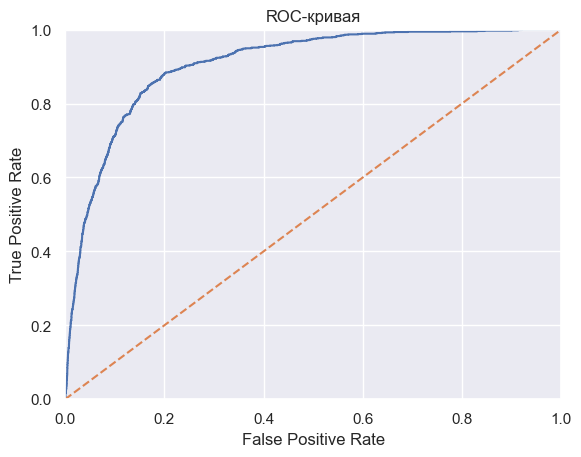

In [73]:
probabilities_valid = model.predict_proba(X_test)
probabilities_one_valid = probabilities_valid[:, 1]


plt.figure()

# < постройте график >
fpr, tpr, thresholds = roc_curve(y_test, probabilities_one_valid)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--') # вот эта строка была 27-ой
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

plt.show()

In [74]:
round(roc_auc_score(y_test, probabilities_one_valid),3)

0.906

let's add class_weight='balanced'

In [75]:
parameters = {'C' :np.logspace(-2, 4, 7)}
model = LogisticRegression(penalty='l2', max_iter = 400, class_weight='balanced')
log_reg= GridSearchCV(model, parameters, scoring='r2' ,cv=5, n_jobs = -1, verbose=False)

#fit the grid search
log_reg.fit(X_train, y_train)
print(log_reg.best_estimator_)
print('best parametrs: ', log_reg.best_params_)
#model = LogisticRegression(random_state=12345, solver='liblinear')
#model.fit(X_train, y_train)
predicted_test = log_reg.best_estimator_.predict(X_test)
accuracy_test = accuracy_score(predicted_test, y_test)
print('Accuracy is:', round(accuracy_test,3) )
print('F1_Score is:', round(f1_score(y_test, predicted_test),3))
model = log_reg.best_estimator_


LogisticRegression(C=0.01, class_weight='balanced', max_iter=400)
best parametrs:  {'C': 0.01}
Accuracy is: 0.844
F1_Score is: 0.562


C:\Users\peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 640x480 with 0 Axes>

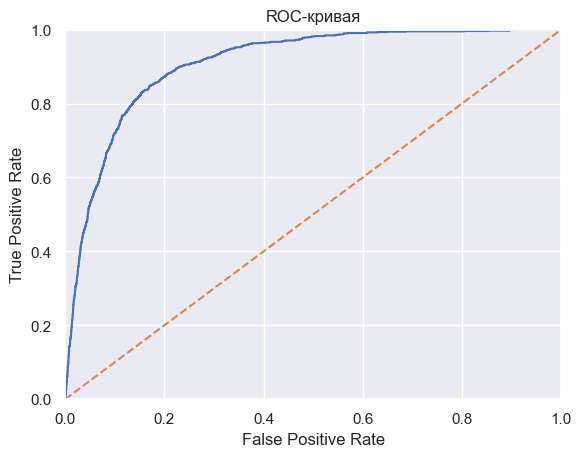

In [76]:
probabilities_valid = model.predict_proba(X_test)
probabilities_one_valid = probabilities_valid[:, 1]


plt.figure()

# < постройте график >
fpr, tpr, thresholds = roc_curve(y_test, probabilities_one_valid)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--') # вот эта строка была 27-ой
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()
plt.show()

In [77]:
round(roc_auc_score(y_test, probabilities_one_valid),3)

0.908

In [78]:
reg = model
reg.fit(X_train, y_train)
d = {'weight': reg.coef_.ravel(), 'name': list(X_train.keys())}
dw = pd.DataFrame(data=d)
dw['weight'] = abs(dw['weight'])
q_16 = list(dw.sort_values(by=['weight'], ascending = False).head(3)['name'])
list_answer(q_16)

contact_unknown,duration,poutcome_success


C:\Users\peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


------

## Q17 Random forest
Build a random forest model.
Use random state 42, maximum depth from 2 to 15, and number of estimators in `[10, 20, 50, 100, 200]`
#### Q17.1 What is an optimal depth and number of trees?
#### Q17.2 What is the roc-auc for this params?
#### Q17.3 Build precision-recall curve. What is the highest precision for recall >0.5?
#### Q17.4 Build precision-recall curve. What is the highest recall for precision >0.5?
#### Q17.5 Build precision-recall curve. What is the precision for binarization threshold=0.3?
#### Q17.6 Build precision-recall curve. What is the recall for binarization threshold=0.3?
#### Q17.7 What is the three most important features by random forest?

In [79]:
from sklearn.ensemble import RandomForestClassifier
SEED = 42

In [80]:
parameters = {'C' :np.logspace(-2, 4, 7)}
params = [
    {
        'n_estimators': [10, 20, 50, 100, 200],
        'max_depth': np.arange(2, 16, 1),
    }
]
model = RandomForestClassifier(random_state=SEED)

In [81]:

#grid = GridSearchCV(param_grid=params, scoring='r2', cv=5, verbose=True)
log_reg = GridSearchCV(model, params, scoring='r2' ,cv=5, n_jobs = -1, verbose=False)
log_reg.fit(X_train, y_train)
print(log_reg.best_estimator_)
print('best parametrs: ', log_reg.best_params_)
#model = LogisticRegression(random_state=12345, solver='liblinear')
#model.fit(X_train, y_train)
predicted_test = log_reg.best_estimator_.predict(X_test)
accuracy_test = accuracy_score(predicted_test, y_test)
print('Accuracy is:', round(accuracy_test,3) )
print('F1_Score is:', round(f1_score(y_test, predicted_test),3))
model = log_reg.best_estimator_

C:\Users\peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=14, n_estimators=200, random_state=42)
best parametrs:  {'max_depth': 14, 'n_estimators': 200}
Accuracy is: 0.902
F1_Score is: 0.433


In [82]:
probabilities_valid = model.predict_proba(X_test)
probabilities_one_valid = probabilities_valid[:, 1]
round(roc_auc_score(y_test, probabilities_one_valid),3)

0.926

In [83]:
y_prob = model.predict_proba(X_test)
y_prob = y_prob[:, 1]
y_pred = predicted_test

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.30')

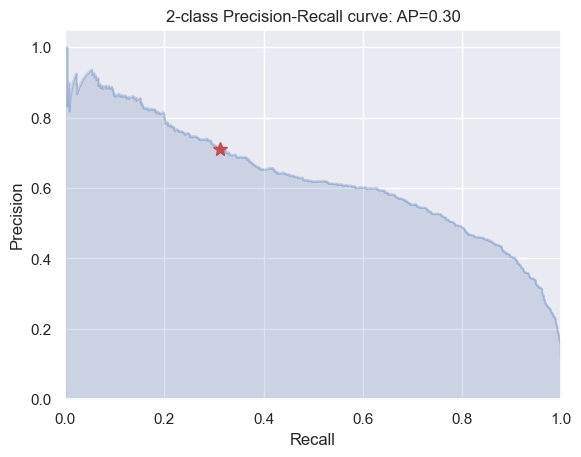

In [84]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve, average_precision_score
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.step(recall, precision, color='b', alpha=0.2, where='post')

plt.plot(recall_score(y_test, y_pred), 
         precision_score(y_test, y_pred), 
         '*r', ms=10
         )
plt.fill_between(recall, precision, alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision_score(y_test, y_pred)))

In [85]:
round(precision[np.array(recall.tolist())>0.5].max(), 3)

0.621

In [86]:
threshold = 0.3

predicted_proba = model.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

precision = precision_score(y_test, predicted)

In [89]:
round(precision, 3)

0.568

In [90]:
reg = model
reg.fit(X_train, y_train)
d = {'weight': reg.feature_importances_, 'name': list(X_train.keys())}
dw = pd.DataFrame(data=d)
dw['weight'] = abs(dw['weight'])
q_16 = list(dw.sort_values(by=['weight'], ascending = False).head(3)['name'])
list_answer(q_16)

C:\Users\peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


age,duration,poutcome_success


-----

## Q18 Feature selection
Select **top-30** features (by random forest model). Train random forest again with the same parameters of grid search. 
#### 18.1 What is the roc-auc score for this model?
#### 18.2 What is the f1 score for this model?
#### 18.3 Does the classification quality improve after feature selection? What do you think? Please, answer here

In [93]:
new_df = pd.DataFrame()

In [94]:
q_16 = list(dw.sort_values(by=['weight'], ascending = False).head(30)['name'])
for i in q_16:
    new_df[i]=df[i]
new_df.head()

,duration,poutcome_success,age,balance,day_of_week,pdays,housing,campaign,previous,contact_unknown,...,education_secondary,loan,month_jul,marital_single,job_technician,job_management,month_nov,job_blue-collar,job_student,contact_telephone
0,261,0,58,2143,5,-1,1,1,0,1,...,0,0,0,0,0,1,0,0,0,0
1,151,0,44,29,5,-1,1,1,0,1,...,1,0,0,1,1,0,0,0,0,0
2,76,0,33,2,5,-1,1,1,0,1,...,1,1,0,0,0,0,0,0,0,0
3,92,0,47,1506,5,-1,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,198,0,33,1,5,-1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0


In [95]:
X_train, X_test, y_train, y_test = train_test_split(new_df, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
features =list(X_train.columns)
X_train[features] = scaler.fit_transform(X_train[list(features)])
X_test[features] = scaler.transform(X_test[list(features)])
X_train.head(10)

,duration,poutcome_success,age,balance,day_of_week,pdays,housing,campaign,previous,contact_unknown,...,education_secondary,loan,month_jul,marital_single,job_technician,job_management,month_nov,job_blue-collar,job_student,contact_telephone
3344,-0.719756,-0.186046,0.006515,-0.169381,-0.098218,-0.411364,0.892343,-0.565886,-0.244772,1.575663,...,-1.032947,-0.438594,-0.425164,-0.627629,-0.450237,-0.511484,-0.310107,1.906137,-0.144724,-0.261744
17965,0.047138,-0.186046,0.759937,0.017848,1.703422,-0.411364,0.892343,-0.245389,-0.244772,-0.634653,...,-1.032947,-0.438594,2.352033,-0.627629,2.221052,-0.511484,-0.310107,-0.524621,-0.144724,-0.261744
18299,-0.493970,-0.186046,0.100693,0.820681,1.823532,-0.411364,-1.120646,0.395606,-0.244772,-0.634653,...,0.968104,-0.438594,2.352033,-0.627629,-0.450237,-0.511484,-0.310107,-0.524621,-0.144724,-0.261744
10221,0.459781,-0.186046,-0.370196,-0.489588,-0.578656,-0.411364,0.892343,2.639088,-0.244772,1.575663,...,-1.032947,-0.438594,-0.425164,1.593298,-0.450237,1.955096,-0.310107,-0.524621,-0.144724,-0.261744
32192,0.027674,-0.186046,1.419181,0.706889,-0.098218,-0.411364,-1.120646,-0.245389,-0.244772,-0.634653,...,-1.032947,-0.438594,-0.425164,-0.627629,-0.450237,-0.511484,-0.310107,1.906137,-0.144724,-0.261744
23098,0.000424,-0.186046,-0.181840,0.828951,1.222985,-0.411364,-1.120646,2.959585,-0.244772,-0.634653,...,0.968104,-0.438594,-0.425164,1.593298,2.221052,-0.511484,-0.310107,-0.524621,-0.144724,-0.261744
6633,0.015995,-0.186046,-1.029440,-0.169381,1.463204,-0.411364,0.892343,1.036601,-0.244772,1.575663,...,-1.032947,-0.438594,-0.425164,1.593298,-0.450237,1.955096,-0.310107,-0.524621,-0.144724,-0.261744
313,-0.166969,-0.186046,-0.370196,-0.318569,-1.299312,-0.411364,0.892343,-0.245389,-0.244772,1.575663,...,0.968104,2.280013,-0.425164,-0.627629,-0.450237,-0.511484,-0.310107,-0.524621,-0.144724,-0.261744
12525,-0.420005,-0.186046,-1.406151,-0.268619,-1.539531,-0.411364,-1.120646,-0.565886,-0.244772,1.575663,...,0.968104,-0.438594,2.352033,-0.627629,-0.450237,-0.511484,-0.310107,-0.524621,-0.144724,-0.261744
44313,0.323531,5.375026,1.325003,-0.013578,1.463204,0.507660,-1.120646,-0.565886,0.598884,-0.634653,...,-1.032947,-0.438594,2.352033,-0.627629,2.221052,-0.511484,-0.310107,-0.524621,-0.144724,-0.261744


In [96]:
parameters = {'C' :np.logspace(-2, 4, 7)}
params = [
    {
        'n_estimators': [10, 20, 50, 100, 200],
        'max_depth': np.arange(2, 16, 1),
    }
]
model = RandomForestClassifier(random_state=SEED)
#grid = GridSearchCV(param_grid=params, scoring='r2', cv=5, verbose=True)
log_reg = GridSearchCV(model, params, scoring='r2' ,cv=5, n_jobs = -1, verbose=False)
log_reg.fit(X_train, y_train)
print(log_reg.best_estimator_)
print('best parametrs: ', log_reg.best_params_)
#model = LogisticRegression(random_state=12345, solver='liblinear')
#model.fit(X_train, y_train)
predicted_test = log_reg.best_estimator_.predict(X_test)
accuracy_test = accuracy_score(predicted_test, y_test)
print('Accuracy is:', round(accuracy_test,3) )
print('F1_Score is:', round(f1_score(y_test, predicted_test),3))
model = log_reg.best_estimator_

C:\Users\peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=15, n_estimators=200, random_state=42)
best parametrs:  {'max_depth': 15, 'n_estimators': 200}
Accuracy is: 0.903
F1_Score is: 0.48


In [97]:
probabilities_valid = model.predict_proba(X_test)
probabilities_one_valid = probabilities_valid[:, 1]
round(roc_auc_score(y_test, probabilities_one_valid),3)

0.925

In [98]:
reg = model
reg.fit(X_train, y_train)
d = {'weight': reg.feature_importances_, 'name': list(X_train.keys())}
dw = pd.DataFrame(data=d)
dw['weight'] = abs(dw['weight'])
q_16 = list(dw.sort_values(by=['weight'], ascending = False).head(3)['name'])
list_answer(q_16)

C:\Users\peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


age,duration,poutcome_success


There is no big changes. May be weight of other features was too small, so we gain not beteer model

------
## Q19 (2 points) Analysis
Analyze the resulting top-3 features of three previously considered methods. Are they consistent with each other. Are there any strange features among top features of any feature selection algorithm? Please, write your thoughts here.

----

1st method: contact_unknown,duration,poutcome_success  
2nd method: age,duration,poutcome_success
3rd method: age,duration,poutcome_success

As you can see - the most important features are the same for the random forest. This is logical - because the best 30 features were left. However, in Logistic regression the attributes are different. Obviously, the length of the conversation and the profitability of the past company are the most important attributes. This is logical - if the client hangs up immediately - it is unlikely that something was successful, and high profitability in the past inspires confidence. However, in the third attribute we see a difference - age and unknown type of communication. The last feature is strange, it is more logical to assume that at different ages people have different comfortable risk, and therefore are more or less inclined to open a term deposit. But perhaps there is some most effective way to persuade a client that is not specified.

## Q20 Build the stronger model

#### 20.1 (3 points) Generate two (or more) meaningfull features. 
Feel free to change the preprocessing, if you need it (eg. explicitly use categorical features for CatBoost).

Also, feel free to select features, etc. The pipeline is up to you.
#### (3 points) Train a gradient boosting, that beats random forest using:
#### 20.2 `XGBoost`
#### 20.3 `CatBoost`

We can add culumn "non-dialing" if the duration was less than 25 seconds. Usually this sign is used in banks, because 25 seconds is the duration of ringing tone.

In [99]:
df['non-dialing']=(df['duration']>=25).astype(int)

In [100]:
df['balance'].mean()

1362.2720576850766

If someone have more then 1362 on balance, that means, that he have more money, may be such people are more likely to open time deposits because they have free funds

In [101]:
df['free-fonds']=(df['balance']>=1362).astype(int)

In [102]:
df.sample(10)

,age,default,balance,housing,loan,day_of_week,duration,campaign,pdays,previous,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,non-dialing,free-fonds
33627,37,0,2390,1,0,20,20,2,335,12,...,0,0,0,0,0,0,0,0,0,1
35581,25,0,933,1,0,7,463,2,-1,0,...,0,1,0,0,0,0,0,1,1,0
2503,51,0,3132,0,0,13,459,1,-1,0,...,0,1,0,0,0,0,0,1,1,1
35730,48,0,5078,1,0,8,139,1,-1,0,...,0,1,0,0,0,0,0,1,1,1
10266,40,0,240,0,0,12,68,4,-1,0,...,0,0,0,0,0,0,0,1,1,0
8937,29,0,68,1,0,4,69,4,-1,0,...,0,0,0,0,0,0,0,1,1,0
576,53,0,288,0,0,6,69,1,-1,0,...,0,1,0,0,0,0,0,1,1,0
7791,46,0,-287,1,0,30,113,3,-1,0,...,0,1,0,0,0,0,0,1,1,0
10105,39,0,393,1,0,11,339,1,-1,0,...,0,0,0,0,0,0,0,1,1,0
443,24,0,0,1,0,6,278,1,-1,0,...,0,1,0,0,0,0,0,1,1,0


In [103]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
features =list(X_train.columns)
X_train[features] = scaler.fit_transform(X_train[list(features)])
X_test[features] = scaler.transform(X_test[list(features)])
X_train.head(10)

,age,default,balance,housing,loan,day_of_week,duration,campaign,pdays,previous,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,non-dialing,free-fonds
3344,0.006515,-0.138113,-0.169381,0.892343,-0.438594,-0.098218,-0.719756,-0.565886,-0.411364,-0.244772,...,-0.102219,1.516277,-0.310107,-0.129771,-0.113999,-0.207791,-0.186046,0.472806,0.19131,-0.592763
17965,0.759937,-0.138113,0.017848,0.892343,-0.438594,1.703422,0.047138,-0.245389,-0.411364,-0.244772,...,-0.102219,-0.659510,-0.310107,-0.129771,-0.113999,-0.207791,-0.186046,0.472806,0.19131,1.687016
18299,0.100693,-0.138113,0.820681,-1.120646,-0.438594,1.823532,-0.493970,0.395606,-0.411364,-0.244772,...,-0.102219,-0.659510,-0.310107,-0.129771,-0.113999,-0.207791,-0.186046,0.472806,0.19131,1.687016
10221,-0.370196,-0.138113,-0.489588,0.892343,-0.438594,-0.578656,0.459781,2.639088,-0.411364,-0.244772,...,-0.102219,-0.659510,-0.310107,-0.129771,-0.113999,-0.207791,-0.186046,0.472806,0.19131,-0.592763
32192,1.419181,-0.138113,0.706889,-1.120646,-0.438594,-0.098218,0.027674,-0.245389,-0.411364,-0.244772,...,-0.102219,-0.659510,-0.310107,-0.129771,-0.113999,-0.207791,-0.186046,0.472806,0.19131,1.687016
23098,-0.181840,-0.138113,0.828951,-1.120646,-0.438594,1.222985,0.000424,2.959585,-0.411364,-0.244772,...,-0.102219,-0.659510,-0.310107,-0.129771,-0.113999,-0.207791,-0.186046,0.472806,0.19131,1.687016
6633,-1.029440,-0.138113,-0.169381,0.892343,-0.438594,1.463204,0.015995,1.036601,-0.411364,-0.244772,...,-0.102219,1.516277,-0.310107,-0.129771,-0.113999,-0.207791,-0.186046,0.472806,0.19131,-0.592763
313,-0.370196,-0.138113,-0.318569,0.892343,2.280013,-1.299312,-0.166969,-0.245389,-0.411364,-0.244772,...,-0.102219,1.516277,-0.310107,-0.129771,-0.113999,-0.207791,-0.186046,0.472806,0.19131,-0.592763
12525,-1.406151,-0.138113,-0.268619,-1.120646,-0.438594,-1.539531,-0.420005,-0.565886,-0.411364,-0.244772,...,-0.102219,-0.659510,-0.310107,-0.129771,-0.113999,-0.207791,-0.186046,0.472806,0.19131,-0.592763
44313,1.325003,-0.138113,-0.013578,-1.120646,-0.438594,1.463204,0.323531,-0.565886,0.507660,0.598884,...,-0.102219,-0.659510,-0.310107,-0.129771,-0.113999,-0.207791,5.375026,-2.115033,0.19131,-0.592763


In [104]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7]
}

xgb_model = XGBClassifier()

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train)

print("Лучшие параметры: ", grid_result.best_params_)
print("Лучшее значение ROC-AUC: ", grid_result.best_score_)

Лучшие параметры:  {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 1000}
Лучшее значение ROC-AUC:  0.9343008555718075


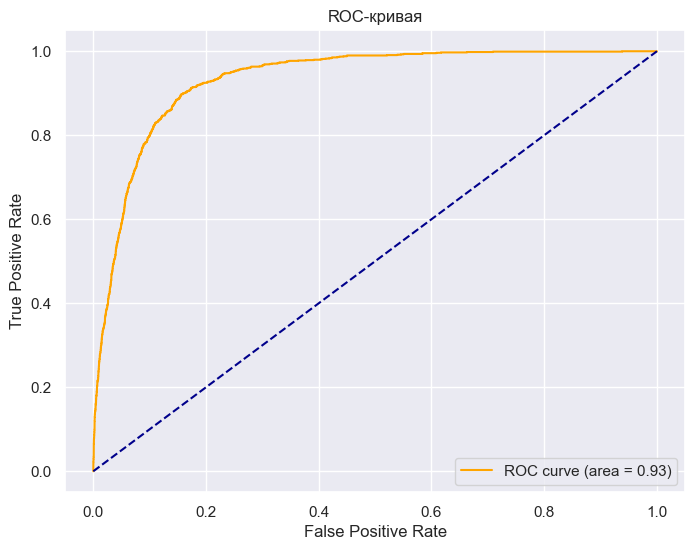

In [106]:
model = grid_result.best_estimator_
probabilities_valid = model.predict_proba(X_test)
probabilities_one_valid = probabilities_valid[:, 1]


# < постройте график >
fpr, tpr, thresholds = roc_curve(y_test, probabilities_one_valid)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % grid_result.best_score_)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()